In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import seaborn as sns

In [17]:
vaccine_df = pd.read_csv("data/covid-19-post-vaccination-statewide-stats.csv")
vaccine_df.head(3)

         date        area area_type  unvaccinated_cases  vaccinated_cases  \
0  2021-02-01  California     State               13861                24   
1  2021-02-02  California     State               11380                18   
2  2021-02-03  California     State               10358                27   

   boosted_cases  unvaccinated_hosp  vaccinated_hosp  boosted_hosp  \
0              0                764                0             0   
1              0                592                0             0   
2              0                546                0             0   

   unvaccinated_deaths  ...  population_boosted  unvaccinated_cases_per_100k  \
0                   12  ...                   0                          NaN   
1                   15  ...                   0                          NaN   
2                   17  ...                   0                          NaN   

   vaccinated_cases_per_100k  boosted_cases_per_100k  \
0                        NaN     

In [18]:
# Replace NaN to 0
vaccine_df.fillna(0, inplace=True)

# Make date column to Date-type.
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])

# Sort the dataframe by date.
vaccine_df.index = vaccine_df['date']
vaccine_df.sort_index(inplace=True)

vaccine_df.head(3)


                 date        area area_type  unvaccinated_cases  \
date                                                              
2021-02-01 2021-02-01  California     State               13861   
2021-02-02 2021-02-02  California     State               11380   
2021-02-03 2021-02-03  California     State               10358   

            vaccinated_cases  boosted_cases  unvaccinated_hosp  \
date                                                             
2021-02-01                24              0                764   
2021-02-02                18              0                592   
2021-02-03                27              0                546   

            vaccinated_hosp  boosted_hosp  unvaccinated_deaths  ...  \
date                                                            ...   
2021-02-01                0             0                   12  ...   
2021-02-02                0             0                   15  ...   
2021-02-03                0             0        

In [19]:
# Style settings of the plot.
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green,
              CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

pd.options.display.notebook_repr_html = False  
plt.rcParams['figure.dpi'] = 100


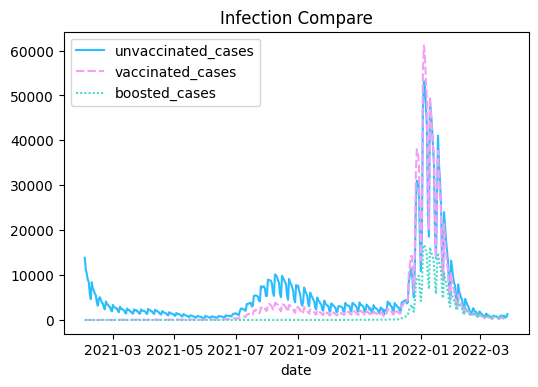

In [20]:
# Infaction cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_cases'],
             vaccine_df['vaccinated_cases'],
             vaccine_df['boosted_cases']]).set(title="Infection Compare")

plt.show()

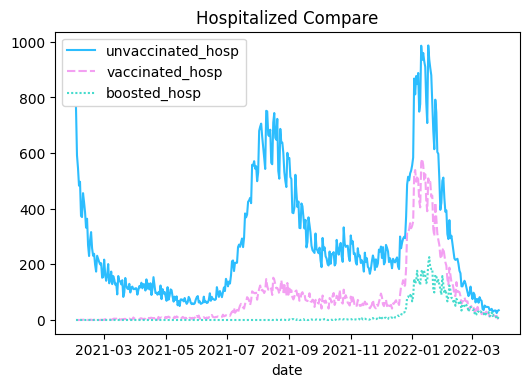

In [21]:
# Hospitalized cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_hosp'],
             vaccine_df['vaccinated_hosp'],
             vaccine_df['boosted_hosp']]).set(title="Hospitalized Compare")
plt.show()

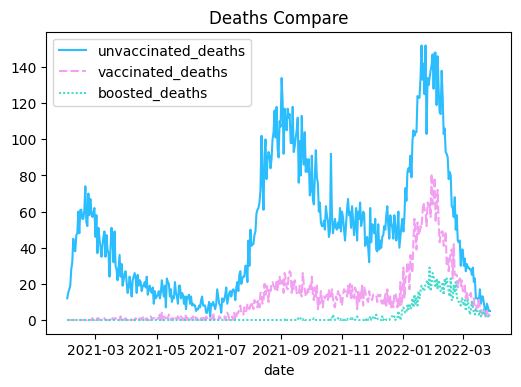

In [22]:
# Death cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_deaths'],
             vaccine_df['vaccinated_deaths'],
             vaccine_df['boosted_deaths']]).set(title="Deaths Compare")
plt.show()


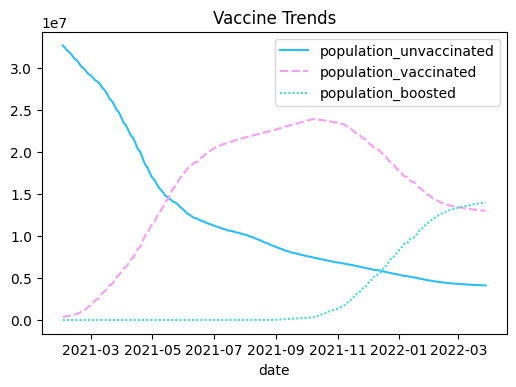

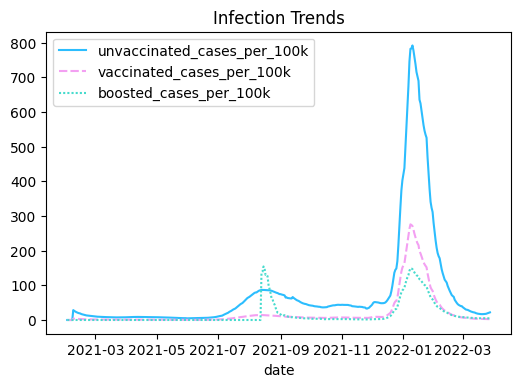

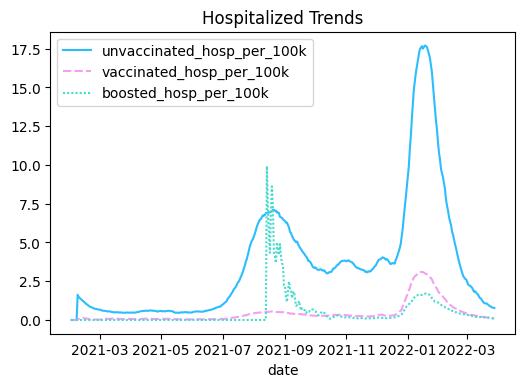

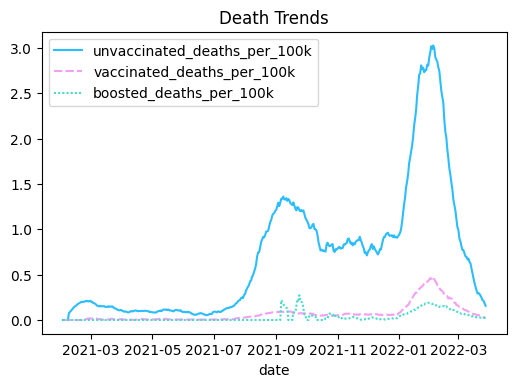

In [23]:
# The vaccined trends.
sns.lineplot(data=[vaccine_df['population_unvaccinated'],
             vaccine_df['population_vaccinated'],
             vaccine_df['population_boosted']]).set(title="Vaccine Trends")
plt.show()

# The infection trends
sns.lineplot(data=[vaccine_df['unvaccinated_cases_per_100k'],
             vaccine_df['vaccinated_cases_per_100k'],
             vaccine_df['boosted_cases_per_100k']]).set(title="Infection Trends")
plt.show()

# The hospitalized trends.
sns.lineplot(data=[vaccine_df['unvaccinated_hosp_per_100k'],
             vaccine_df['vaccinated_hosp_per_100k'],
             vaccine_df['boosted_hosp_per_100k']]).set(title="Hospitalized Trends")
plt.show()

# The death trends.
sns.lineplot(data=[vaccine_df['unvaccinated_deaths_per_100k'],
             vaccine_df['vaccinated_deaths_per_100k'],
             vaccine_df['boosted_deaths_per_100k']]).set(title="Death Trends")
plt.show()


In [32]:
# Get multiple rates based on the column data.
vaccine_df['vaccinated_rate'] = vaccine_df['population_vaccinated'] / (
    vaccine_df['population_vaccinated'] + vaccine_df['population_unvaccinated'])

severe_cases = vaccine_df['unvaccinated_hosp'] + vaccine_df['unvaccinated_deaths'] + \
               vaccine_df['vaccinated_hosp'] + vaccine_df['boosted_hosp'] + \
               vaccine_df['vaccinated_deaths'] + vaccine_df['boosted_deaths']

total_cases = vaccine_df['unvaccinated_cases'] + vaccine_df['vaccinated_cases']

vaccine_df['severe_infection_rate'] = severe_cases / total_cases

vaccine_df['severe_cases'] = severe_cases

vaccine_df.head(3)

                 date        area area_type  unvaccinated_cases  \
date                                                              
2021-02-01 2021-02-01  California     State               13861   
2021-02-02 2021-02-02  California     State               11380   
2021-02-03 2021-02-03  California     State               10358   

            vaccinated_cases  boosted_cases  unvaccinated_hosp  \
date                                                             
2021-02-01                24              0                764   
2021-02-02                18              0                592   
2021-02-03                27              0                546   

            vaccinated_hosp  boosted_hosp  unvaccinated_deaths  ...  \
date                                                            ...   
2021-02-01                0             0                   12  ...   
2021-02-02                0             0                   15  ...   
2021-02-03                0             0        

In [35]:
# Correlation analysis

r, p = stats.pearsonr(vaccine_df['population_vaccinated'], vaccine_df['severe_cases'])
print('For vaccinated population and severe cases, r={}, p={}'.format(r, p))

For vaccinated population and severe cases, r=0.2413926283057022, p=5.371243480631814e-07


In [36]:
# There is a positive weak correlation between BMI and charge (r=0.20),
# and it is statistically significant (p<=0.05).

# Linear Regression
import statsmodels.api as sm

X = vaccine_df['population_vaccinated']
Y = vaccine_df['severe_cases']

X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:           severe_cases   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     25.93
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           5.37e-07
Time:                        21:34:50   Log-Likelihood:                -3095.3
No. Observations:                 421   AIC:                             6195.
Df Residuals:                     419   BIC:                             6203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   226.76